<a href="https://colab.research.google.com/github/LBLBLBLBLBLB/machine-learning/blob/master/Complete_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# !pip install yfinance

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [32]:
data = yf.download(tickers = 'BTC-USD', progress = False, start = '2021-01-01', end = '2023-01-01')
data.drop(['High', 'Low', 'Close', 'Adj Close', 'Close', 'Volume'], axis = 1, inplace = True)
data.head()

,Open
Date,
2021-01-01,28994.009766
2021-01-02,29376.455078
2021-01-03,32129.408203
2021-01-04,32810.949219
2021-01-05,31977.041016


<Axes: xlabel='Date'>

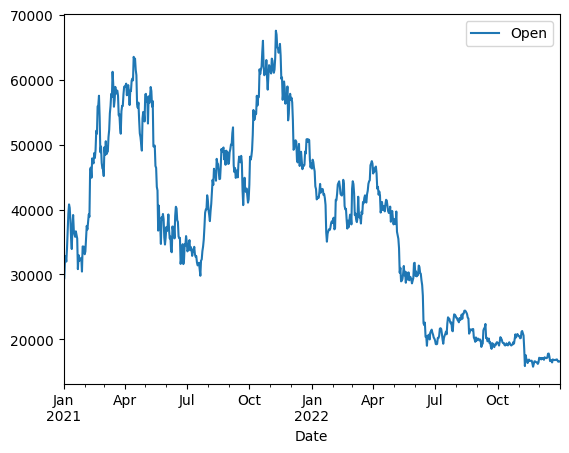

In [33]:
data.plot()

In [34]:
timeseries = data.values
from sklearn.preprocessing import MinMaxScaler
myscaler = MinMaxScaler()
timeseries = myscaler.fit_transform(timeseries)
# print(timeseries)

In [35]:
train_size =int(len(timeseries)*0.67)
test_size =len(timeseries) -train_size
train,test =timeseries[0:train_size,:],timeseries[train_size:len(timeseries),:]

In [36]:
def create_timeseries(timeseries,step):
    dataX,dataY =[],[]
    for i in range(len(timeseries)-step-1):
        a =timeseries[i:(i+step),0]
        dataX.append(a)
        dataY.append(timeseries[i+step,0])
    return np.array(dataX),np.array(dataY)
step_size=4
X_train, y_train =create_timeseries(train,step_size)
X_test,y_test =create_timeseries(test,step_size)


In [37]:
X_train =np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test =np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [41]:
from keras.models import  Sequential
from keras.layers import Dense, LSTM,Bidirectional

In [ ]:
model =Sequential()
model.add(LSTM(units=4,input_shape=(step_size,1),activation='relu',return_sequences=True))
model.add(LSTM(units=4,activation='relu',return_sequences=True))
model.add(LSTM(units=2,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

In [43]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1,verbose=1,epochs=100)

Epoch 1/100
484/484 [==============================] - 18s 20ms/step - loss: 0.0726 - val_loss: 0.1853
Epoch 2/100
484/484 [==============================] - 7s 15ms/step - loss: 0.0203 - val_loss: 0.1336
Epoch 3/100
484/484 [==============================] - 8s 17ms/step - loss: 0.0074 - val_loss: 0.0437
Epoch 4/100
484/484 [==============================] - 8s 17ms/step - loss: 0.0035 - val_loss: 0.0288
Epoch 5/100
484/484 [==============================] - 8s 16ms/step - loss: 0.0032 - val_loss: 0.0273
Epoch 6/100
484/484 [==============================] - 8s 17ms/step - loss: 0.0032 - val_loss: 0.0295
Epoch 7/100
484/484 [==============================] - 8s 17ms/step - loss: 0.0033 - val_loss: 0.0274
Epoch 8/100
484/484 [==============================] - 7s 15ms/step - loss: 0.0032 - val_loss: 0.0231
Epoch 9/100
484/484 [==============================] - 8s 17ms/step - loss: 0.0032 - val_loss: 0.0229
Epoch 10/100
484/484 [==============================] - 8s 18ms/step - loss: 0.00